<a href="https://colab.research.google.com/github/MattWang-Portfolio/data-processing-Indian_liver_patient/blob/main/Project1_Indian_liver_patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datasets Source
This dataset was from the UCI ML Repository:
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

## Dataset Information
This training dataset contains 467 records, including 333 liver patient records and 134 non liver patient records. The data set was collected from north east of Andhra Pradesh, India. Label field is a class label used to divide into groups(liver patient or not). Any patient whose age exceeded 89 is listed as being of age "90".

## Attribute Information:
1. Age: Age of the patient (年齡)
2. Gender: Gender of the patient (性別)
3. TB: Total Bilirubin (總膽紅素)
4. DB: Direct Bilirubin (直接型膽紅素/結合型膽紅素)
5. Alkphos: Alkaline Phosphotase (鹼性磷酸酶)
6. Sgpt: Alamine Aminotransferase (麩胺酸丙酮酸轉氨基酶/GPT)
7. Sgot: Aspartate Aminotransferase (麩胺酸苯醋酸轉氨基酶/GOT)
8. TP: Total Protiens (總蛋白)
9. ALB: Albumin (白蛋白)
10. A/G Ratio: Albumin and Globulin Ratio (白蛋白/球蛋白比值)
11. Label: used to split the data into two sets

## Additional information
[如何解讀肝功能檢驗報告]
https://www.jah.org.tw/form/index-1.asp?m=3&m1=8&m2=366&gp=361&id=522


### Download the training set

In [ ]:
# Download from Google Drive
!gdown --id 1Y2gYY8XUWgcIA_GbytBuXoRkLlAWxnAF

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y2gYY8XUWgcIA_GbytBuXoRkLlAWxnAF
To: /content/project1_indian_liver_patient.zip
100% 8.37k/8.37k [00:00<00:00, 8.71MB/s]


In [ ]:
!unzip project1_indian_liver_patient.zip
# if seeing the message: "replace project1_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:"
# you may enter "A"

Archive:  project1_indian_liver_patient.zip
  inflating: project1_test.csv       
  inflating: project1_train.csv      


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('project1_train.csv')
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
1,78,Male,1.0,0.3,152,28,70,6.3,3.1,0.9,1
2,60,Male,2.0,0.8,190,45,40,6.0,2.8,0.8,1
3,75,Male,10.6,5.0,562,37,29,5.1,1.8,0.5,1
4,19,Female,0.7,0.2,186,166,397,5.5,3.0,1.2,1


### The stage is yours

In [ ]:
df.shape

(467, 11)

In [ ]:
df.info


<bound method DataFrame.info of      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     40  Female              0.9               0.3                   293   
1     78    Male              1.0               0.3                   152   
2     60    Male              2.0               0.8                   190   
3     75    Male             10.6               5.0                   562   
4     19  Female              0.7               0.2                   186   
..   ...     ...              ...               ...                   ...   
462   32    Male              0.7               0.2                   276   
463   58    Male              0.8               0.2                   180   
464   34    Male              5.9               2.5                   290   
465   36    Male              0.8               0.2                   182   
466   54    Male              2.2               1.2                   195   

     Alamine_Aminotransferase  Aspartate_Am

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

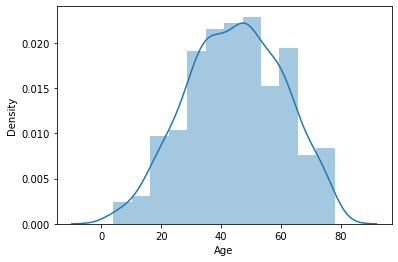

In [ ]:
sns.distplot(df['Age'])

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df['Albumin_and_Globulin_Ratio']=imp.fit_transform(df[['Albumin_and_Globulin_Ratio']])


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Label                         0
dtype: int64

In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,44.644540,3.403640,1.497859,290.687366,77.751606,111.413276,6.531049,3.141756,0.928683,0.713062
std,15.797878,6.497494,2.815430,240.896655,172.933719,305.893026,1.087601,0.803260,0.313539,0.452817
min,4.000000,0.500000,0.100000,75.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,177.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.900000,1.000000
75%,57.000000,2.650000,1.300000,298.000000,61.000000,88.000000,7.200000,3.800000,1.100000,1.000000
max,78.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [ ]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,44.644540,0.736617,3.403640,1.497859,290.687366,77.751606,111.413276,6.531049,3.141756,0.928683,0.713062
std,15.797878,0.440941,6.497494,2.815430,240.896655,172.933719,305.893026,1.087601,0.803260,0.313539,0.452817
min,4.000000,0.000000,0.500000,0.100000,75.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,177.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.900000,1.000000
75%,57.000000,1.000000,2.650000,1.300000,298.000000,61.000000,88.000000,7.200000,3.800000,1.100000,1.000000
max,78.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
X = df.iloc[:, :10]
y = df['Label']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values


In [ ]:

SEED=1


model = LogisticRegression(random_state=SEED)


knn = KNN(n_neighbors=27)


dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)


classifiers = [('Logistic Regression', model), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=SEED)
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.746
K Nearest Neighbours : 0.734
Classification Tree : 0.612


### Make prediction and submission file

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy


0.746177370030581

In [ ]:
x_test = pd.read_csv('project1_test.csv')
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_test['Albumin_and_Globulin_Ratio']=imp.fit_transform(x_test[['Albumin_and_Globulin_Ratio']])

x_test['Gender'] = x_test['Gender'].apply(lambda x:1 if x == 'Male' else 0)

df_submit = pd.DataFrame([], columns=['Id', 'Category'])
df_submit['Id'] = [f'{i:03d}' for i in range(len(x_test))]
df_submit['Category'] = model.predict(x_test)

In [ ]:
df_submit.to_csv('submission.csv', index=None)